# Statistics for Data Science with Python

In [39]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats  as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [55]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(url)
boston_df.head()
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Task 2: Descriptive Statistics and Visualizations

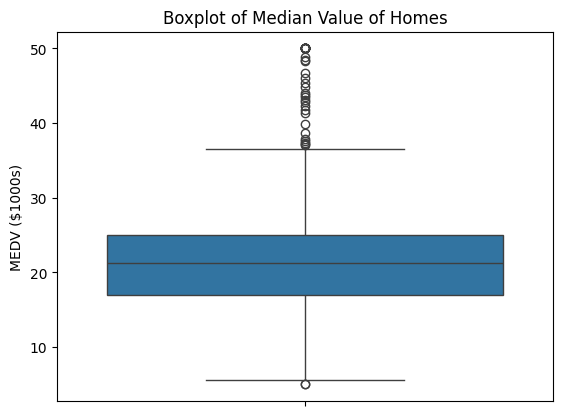

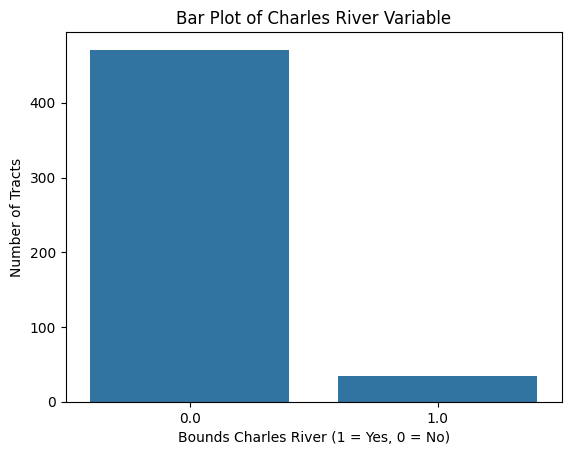

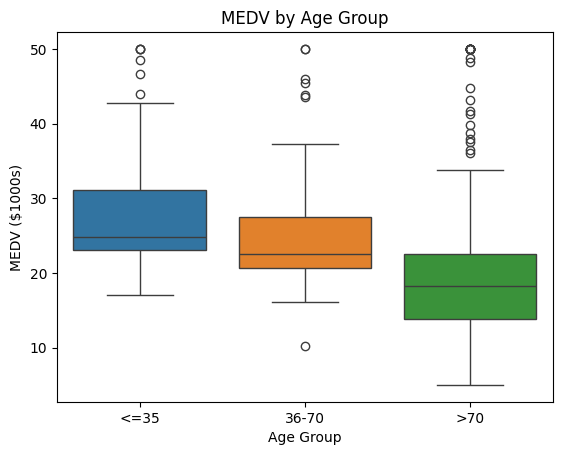

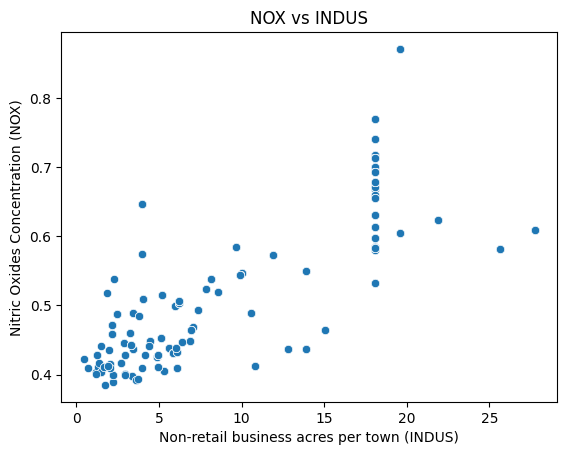

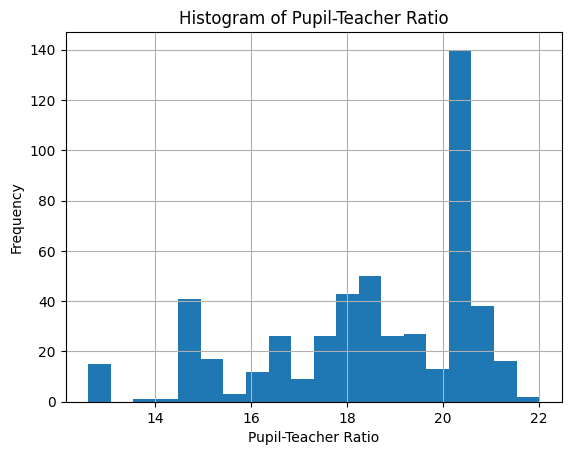

In [52]:
#plt.figure(figsize=(6, 4))

# Boxplot for MEDV
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Homes')
plt.ylabel('MEDV ($1000s)')
plt.show()

# Bar plot for CHAS
#boston_df['CHAS'].value_counts().plot(kind='bar')
sns.barplot(boston_df['CHAS'].value_counts())
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Bounds Charles River (1 = Yes, 0 = No)')
plt.ylabel('Number of Tracts')
plt.show()

# Boxplot of MEDV vs AGE groups
age_bins = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '36-70', '>70'])
boston_df['AGE_GROUP'] = age_bins
sns.boxplot(x='AGE_GROUP', y='MEDV', hue='AGE_GROUP', data=boston_df)
plt.title('MEDV by Age Group')
plt.xlabel('Age Group')
plt.ylabel('MEDV ($1000s)')
plt.show()

# Scatter plot: NOX vs INDUS
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('NOX vs INDUS')
plt.xlabel('Non-retail business acres per town (INDUS)')
plt.ylabel('Nitric Oxides Concentration (NOX)')
plt.show()

# Histogram for PTRATIO
boston_df['PTRATIO'].hist(bins=20)
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

# Task 3: Statistical Tests

## T-test: MEDV for CHAS

In [53]:
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV'] 
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV'] 
t_stat, p_val = stats.ttest_ind(chas_1, chas_0) 
print("T-test: MEDV ~ CHAS") 
print(f"t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}") 
if p_val < 0.05: print("Conclusion: Significant difference in MEDV for CHAS groups") 
else: print("Conclusion: No significant difference in MEDV for CHAS groups")

T-test: MEDV ~ CHAS
t-statistic = 3.9964, p-value = 0.0001
Conclusion: Significant difference in MEDV for CHAS groups


## ANOVA: MEDV ~ AGE_GROUP

In [54]:
anova_model = ols('MEDV ~ AGE_GROUP', data=boston_df).fit() 
anova_table = sm.stats.anova_lm(anova_model, typ=3) 
print("\nANOVA: MEDV ~ AGE_GROUP") 
print(anova_table) 
if anova_table['PR(>F)'].iloc[0] < 0.05: print("Conclusion: Significant difference in MEDV across AGE groups") 
else: print("Conclusion: No significant difference in MEDV across AGE groups")


ANOVA: MEDV ~ AGE_GROUP
                 sum_sq     df           F         PR(>F)
Intercept  70206.173187    1.0  946.378619  1.122421e-117
AGE_GROUP   5401.731883    2.0   36.407650   1.710501e-15
Residual   37314.563532  503.0         NaN            NaN
Conclusion: Significant difference in MEDV across AGE groups


## Pearson Correlation: NOX vs INDUS

In [45]:
corr, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS']) 
print("\nPearson Correlation: NOX vs INDUS") 
print(f"Correlation = {corr:.4f}, p-value = {p_value:.4f}") 
if p_value < 0.05: print("Conclusion: Significant relationship between NOX and INDUS") 
else: print("Conclusion: No significant relationship between NOX and INDUS")


Pearson Correlation: NOX vs INDUS
Correlation = 0.7637, p-value = 0.0000
Conclusion: Significant relationship between NOX and INDUS


## Regression: DIS on MEDV

In [57]:
X = sm.add_constant(boston_df['DIS']) 
model = sm.OLS(boston_df['MEDV'], X).fit() 
print("\nRegression Analysis: MEDV ~ DIS") 
print(model.summary()) 
if model.pvalues['DIS'] < 0.05: print("Conclusion: DIS has a significant impact on MEDV") 
else: print("Conclusion: DIS has no significant impact on MEDV")


Regression Analysis: MEDV ~ DIS
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 12 Apr 2025   Prob (F-statistic):           1.21e-08
Time:                        16:12:20   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.39